# Read with Matplotlib

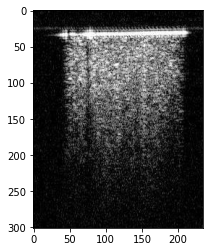

In [1]:
# From https://www.geeksforgeeks.org/reading-images-in-python/

# Python program to read  
# image using matplotlib 
  
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('/work/omicsbio/paulcalle/Kidney_project/images/k1/k1_cortex/1_k1_cortex.jpg', format = "jpg") 
  
# Output Images 
plt.imshow(img) 

In [2]:
img.shape

(301, 235, 3)

In [3]:
type(img)

numpy.ndarray

In [4]:
img[60,60,:]

array([157, 157, 157], dtype=uint8)

The values in the three channels repeat

# Reading the whole directory

In [5]:
import numpy as np

In [6]:
import os, sys

# Open a file
path = "/work/omicsbio/paulcalle/Kidney_project/images/"
dirs = os.listdir( path )

# It will get the directories with the full directory name
l_folders = [] 
# This would print all directories
for item in dirs:
    temp_dir = path + item
    if os.path.isdir(temp_dir):
        subdirs = os.listdir(temp_dir)
        for subitem in subdirs:
            l_folders.append(temp_dir + "/" +subitem)
            print(subitem)

k7_medulla
k7_cortex
k7_pelvis_calyx
k4_medulla
k4_pelvis_calyx
k4_cortex
k9_pelvis_calyx
k9_medulla
k9_cortex
k3_medulla
k3_pelvis_calyx
k3_cortex
k10_medulla
k10_pelvis_calyx
k10_cortex
k1_cortex
k1_medulla
k1_pelvis_calyx
k6_medulla
k6_cortex
k6_pelvis_calyx
k2_medulla
k2_pelvis_calyx
k2_cortex
k8_pelvis_calyx
k8_cortex
k8_medulla
k5_cortex
k5_pelvis_calyx
k5_medulla


In [7]:
dirs

['k7', 'k4', 'k9', 'k3', 'k10', 'k1', 'k6', 'k2', 'k8', 'k5']

In [8]:
l_folders[:5]

['/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_medulla',
 '/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_cortex',
 '/work/omicsbio/paulcalle/Kidney_project/images/k7/k7_pelvis_calyx',
 '/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_medulla',
 '/work/omicsbio/paulcalle/Kidney_project/images/k4/k4_pelvis_calyx']

In [9]:
# l_name_files stores the name of the files
l_name_files = []
# l_images stores the images in a numpy ndarray format
l_images = []

for item in l_folders:
    file_dir_temp = os.listdir( item )
#     print(file_dir_temp)
    for item_list in file_dir_temp:
        path_img = item + "/" + item_list
#         print(path_img)
        img = mpimg.imread(path_img, format = "jpg")
#         plt.imshow(img)
        l_images.append(img)
        l_name_files.append(item_list)
#         break

In [10]:
l_name_files[:5]

['344_k7_medulla.jpg',
 '451_k7_medulla.jpg',
 '995_k7_medulla.jpg',
 '828_k7_medulla.jpg',
 '836_k7_medulla.jpg']

In [11]:
len(l_images)

30000

In [12]:
l_images[20000].shape

(301, 235, 3)

In [13]:
l_name_files[0]

'344_k7_medulla.jpg'

In [14]:
# Since the three channels repeat
# Just using one
l_images_1D = [ item[:,:,0] for item in l_images]

In [15]:
len(l_images_1D)

30000

In [16]:
l_images_1D[0].shape

(301, 235)

In [17]:
# Converting to array
a_images_1D = np.array(l_images_1D)

In [18]:
a_images_1D.shape

(30000, 301, 235)

In [19]:
a_images_1D[0].shape

(301, 235)

# Label the data

In [20]:
import re

l_label = []

for item in l_name_files:

    if "cortex" in item:
        l_label.append("cortex")
    elif "medulla" in item:
        l_label.append("medulla")
    elif "pelvis" in item:
        l_label.append("pelvis_calyx")
    
#     break
#
    
    # $list(filter(lambda v: re.match('rs', v), l_sample))

In [21]:
a_label = np.array(l_label)

In [22]:
a_label

array(['medulla', 'medulla', 'medulla', ..., 'medulla', 'medulla',
       'medulla'], dtype='<U12')

In [23]:
dict_count = {}
dict_count["medulla"] = 0
dict_count["cortex"] = 0
dict_count["pelvis_calyx"] = 0

for item in a_label:
    if item == "medulla":
        dict_count["medulla"] += 1
    elif item == "cortex":
        dict_count["cortex"] += 1
    if item == "pelvis_calyx":
        dict_count["pelvis_calyx"] += 1


In [24]:
dict_count

{'medulla': 10000, 'cortex': 10000, 'pelvis_calyx': 10000}

# Get kidney number

In [25]:
l_name_files

l_kidney_num = []

r = re.compile(r'(?<=k)[0-9]+')

for item in l_name_files:

    res = r.search(item)   
    l_kidney_num.append(int(res.group(0)))

In [26]:
a_kidney_num = np.array(l_kidney_num)

In [27]:
a_kidney_num.shape

(30000,)

In [28]:
a_kidney_num[10000]

3

# Saving as binaries

In [55]:
with open('/scratch/paulcalle/kidney_data/a_images_1D.npy', 'wb') as f:
    np.save(f, a_images_1D)

In [58]:
with open('/scratch/paulcalle/kidney_data/a_label.npy', 'wb') as f:
    np.save(f, a_label)

In [154]:
with open('/scratch/paulcalle/kidney_data/a_kidney_num.npy', 'wb') as f:
    np.save(f, a_kidney_num)

In [ ]:
a_kidney_num